<font color="darkgreen">

# Lecture 3.  Improving Deep Neural Networks

## 3.1 Overfitting and underfitting
- Optimization vs. generalization
    - Optimization: train data에서 최고의 성능을 얻으려고 모델을 조정하는 과정 
    - Generalization: 훈련된 모델이 처음 보는 데이터에서 얼마나 잘 수행되는지를 의미

- Underfitting의 발생 
    - epoch가 진행될 수록 train loss와 test loss(validation loss)가 함께 낮아짐 
    - 모델의 성능이 발전될 여지가 있음 (optimization을 더 할 여지가 있음) 

- Overfitting의 발생 
    - epoch가 진행되면서 train loss는 계속 감소하지만 test loss(validation loss)가 증가하기 시작함
    - 훈련 데이터에 특화된 패턴을 학습하기 시작하여 새로운 데이터에 대해 잘못된 판단을 함 
  
<img src="figures/bias.png" width="100%">

<img src="figures/overfitting.png" width="80%"> 

- Overfitting을 방지하기 위한 방법
    - 더 많은 train data를 수집
    - 모델의 복잡성을 축소 
    

#### 3.1.1 Reducing the network size
- 모델의 크기를 줄여 학습 파라메터 수를 줄임
- Layer의 수, 각 layer의 unit 수를 조정 
- 적은 수의 layer, unit에서 시작해서 증가시켜 가면서 validation loss의 감소 추세를 관찰 

In [1]:
!pip install numpy==1.16.1 

     |████████████████████████████████| 13.9MB 1.0MB/s eta 0:00:01
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


17465344/17464789 [==============================] - 12s 1us/step


In [3]:
from keras import models
from keras import layers
import keras.backend as K
import matplotlib.pyplot as plt

In [4]:
K.clear_session()
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [6]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=256,
                                   validation_data=(x_test, y_test),
                                   verbose=2)                  


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.3987 - acc: 0.8498 - val_loss: 0.3024 - val_acc: 0.8836
Epoch 2/20
 - 6s - loss: 0.2242 - acc: 0.9164 - val_loss: 0.2974 - val_acc: 0.8801
Epoch 3/20
 - 8s - loss: 0.1773 - acc: 0.9350 - val_loss: 0.2972 - val_acc: 0.8830
Epoch 4/20
 - 8s - loss: 0.1499 - acc: 0.9461 - val_loss: 0.3207 - val_acc: 0.8786
Epoch 5/20
 - 8s - loss: 0.1271 - acc: 0.9544 - val_loss: 0.4049 - val_acc: 0.8621
Epoch 6/20
 - 8s - loss: 0.1134 - acc: 0.9599 - val_loss: 0.4124 - val_acc: 0.8641
Epoch 7/20
 - 8s - loss: 0.0994 - acc: 0.9653 - val_loss: 0.4367 - val_acc: 0.8598
Epoch 8/20
 - 8s - loss: 0.0862 - acc: 0.9702 - val_loss: 0.4637 - val_acc: 0.8619
Epoch 9/20
 - 8s - loss: 0.0734 - acc: 0.9758 - val_loss: 0.5041 - val_acc: 0.8591
Epoch 10/20
 - 7s - loss: 0.0627 - acc: 0.9797 - val_loss: 0.5573 - val_acc: 0.8579
Epoch 11/20
 - 4s - loss: 0.0552 - acc: 0.9826 - val_loss: 0.6144 - val_acc: 0.8498
Epoch 12/20
 - 8s - loss: 0.0447 -

In [7]:
original_model.save('original_model.h5')  ## 모델 저장 

## model = models.load_model('original_model.h5') ## 저장된 모델 로드 

In [8]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=256,
                                       validation_data=(x_test, y_test),
                                       verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 362us/step - loss: 0.5626 - acc: 0.7346 - val_loss: 0.5015 - val_acc: 0.8218
Epoch 2/20
25000/25000 [==============================] - 8s 316us/step - loss: 0.4453 - acc: 0.8832 - val_loss: 0.4532 - val_acc: 0.8814
Epoch 3/20
25000/25000 [==============================] - 8s 327us/step - loss: 0.3832 - acc: 0.9181 - val_loss: 0.4449 - val_acc: 0.8624
Epoch 4/20
25000/25000 [==============================] - 8s 328us/step - loss: 0.3350 - acc: 0.9347 - val_loss: 0.4137 - val_acc: 0.8773
Epoch 5/20
25000/25000 [==============================] - 8s 339us/step - loss: 0.2909 - acc: 0.9456 - val_loss: 0.4117 - val_acc: 0.8737
Epoch 6/20
25000/25000 [==============================] - 8s 319us/step - loss: 0.2501 - acc: 0.9530 - val_loss: 0.4069 - val_acc: 0.8700
Epoch 7/20
25000/25000 [==============================] - 9s 340us/step - loss: 0.2100 - acc: 0.9590 - val_loss: 0.4017 - 

In [9]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

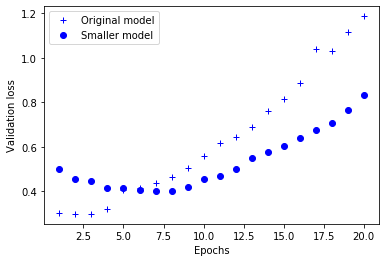

In [10]:


# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

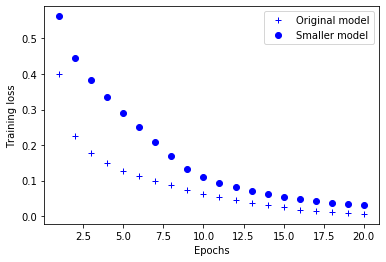

In [11]:
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

<font color=blue>
TO DO: Original model보다 더 큰 네트워크를 구성하고 모형을 적합시킨 후 validation loss와 train loss를 original model과 비교하시오. 

- Smaller model
    - training loss 감소 속도는 더 느림 
    - overfitting이 발생할 여지가 적음 
    - 충분히 train loss가 감소하지 않을 수 있음 (즉, optimization이 덜 됨)
    - validation loss가 최소화 될 때까지 걸리는 시간이 오래 걸림 
- Bigger model
    - validation loss가 초기부터 증가 추세: overfitting 발생 
    - Bigger model의 train loss는 빠르게 감소 
    - train data에 대해 optimization이 잘 되지만 validation set에 대해 성능이 좋지 않음 
    
- 어떻게 최적의 네트워크를 찾는가? 
    - 작은 크기의 모형에서부터 시작 
    - 네트워크 크기를 증가시키면서 (layer의 수, 각 layer의 unit의 수 증가) train loss가 충분히 감소하는지, validation loss가 증가하는지 체크 
    




#### 3.1.2 Adding weight regularization 
- weight가 작은 값을 갖도록 강제하여 weight 값의 분포가 더 균일하게 되도록 만듬 
- 큰 weight에 대한 penalty를 loss function에 추가
    - L1 penalty: weight의 l1-norm $\sum |w_j |$에 비례하는 penalty를 추가 
    - L2 penalty: weight의 l2-norm $\sum w_j^2$에 비례하는 penalty를 추가 
- Keras의 layer에서 `kernel_regularizer` option으로 penalty 추가 
    - L1 penalty: `regularizers.l1(0.001)`
    - L2 penalty: `regularizers.l2(0.001)`
    - L1&L2 penalty: `regularizers.l1_l2(l1=0.001, l2=0.001)`
- penalty term은 training 과정에서만 loss function에 추가 

In [12]:
from keras import regularizers
K.clear_session()

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [13]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=256,
                             validation_data=(x_test, y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.4235 - acc: 0.8488 - val_loss: 0.3334 - val_acc: 0.8886
Epoch 2/20
 - 7s - loss: 0.2825 - acc: 0.9103 - val_loss: 0.3252 - val_acc: 0.8885
Epoch 3/20
 - 4s - loss: 0.2527 - acc: 0.9249 - val_loss: 0.3323 - val_acc: 0.8842
Epoch 4/20
 - 3s - loss: 0.2391 - acc: 0.9290 - val_loss: 0.3525 - val_acc: 0.8816
Epoch 5/20
 - 4s - loss: 0.2299 - acc: 0.9332 - val_loss: 0.3624 - val_acc: 0.8769
Epoch 6/20
 - 4s - loss: 0.2230 - acc: 0.9358 - val_loss: 0.3798 - val_acc: 0.8728
Epoch 7/20
 - 4s - loss: 0.2173 - acc: 0.9398 - val_loss: 0.3788 - val_acc: 0.8732
Epoch 8/20
 - 5s - loss: 0.2112 - acc: 0.9403 - val_loss: 0.3890 - val_acc: 0.8698
Epoch 9/20
 - 6s - loss: 0.2056 - acc: 0.9428 - val_loss: 0.3834 - val_acc: 0.8722
Epoch 10/20
 - 5s - loss: 0.2015 - acc: 0.9440 - val_loss: 0.4269 - val_acc: 0.8609
Epoch 11/20
 - 4s - loss: 0.1945 - acc: 0.9477 - val_loss: 0.4054 - val_acc: 0.8679
Epoch 12/20
 - 4s - loss: 0.1908 - 

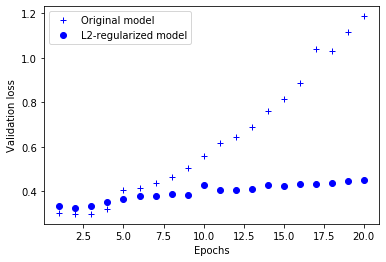

In [14]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- L2 penalty를 추가하였을 때 original model에 비해 validation loss가 천천히 증가함. 즉, overfitting이 덜 되도록 학습되고 있음

#### 3.1.3 Dropout regularization
- Neural network를 위해 사용되는 regularization 기법 중에서 가장 효과적이고 널리 사용되는 방법 중 하나
- Random하게 선택된 node를 매 iteration에서 제외하고 training 진행 
- 일반적으로 dropout rate=0.2~0.5
- Test set에 대해서는 적용하지 않음 
- Keras에서 `Dropout` layer를 추가 
<img src="figures/dropout.PNG" width="80%">

In [15]:
K.clear_session()
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [16]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=256,
                               validation_data=(x_test, y_test),
                              verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5764 - acc: 0.7033 - val_loss: 0.4041 - val_acc: 0.8708
Epoch 2/20
 - 6s - loss: 0.3926 - acc: 0.8538 - val_loss: 0.3069 - val_acc: 0.8830
Epoch 3/20
 - 8s - loss: 0.3127 - acc: 0.8914 - val_loss: 0.2848 - val_acc: 0.8860
Epoch 4/20
 - 6s - loss: 0.2704 - acc: 0.9081 - val_loss: 0.2951 - val_acc: 0.8849
Epoch 5/20
 - 4s - loss: 0.2409 - acc: 0.9170 - val_loss: 0.3087 - val_acc: 0.8831
Epoch 6/20
 - 5s - loss: 0.2259 - acc: 0.9252 - val_loss: 0.3198 - val_acc: 0.8767
Epoch 7/20
 - 6s - loss: 0.2066 - acc: 0.9307 - val_loss: 0.3429 - val_acc: 0.8782
Epoch 8/20
 - 4s - loss: 0.2006 - acc: 0.9328 - val_loss: 0.3848 - val_acc: 0.8735
Epoch 9/20
 - 3s - loss: 0.1868 - acc: 0.9380 - val_loss: 0.3828 - val_acc: 0.8711
Epoch 10/20
 - 3s - loss: 0.1792 - acc: 0.9405 - val_loss: 0.3923 - val_acc: 0.8734
Epoch 11/20
 - 3s - loss: 0.1827 - acc: 0.9422 - val_loss: 0.4120 - val_acc: 0.8734
Epoch 12/20
 - 3s - loss: 0.1687 - 

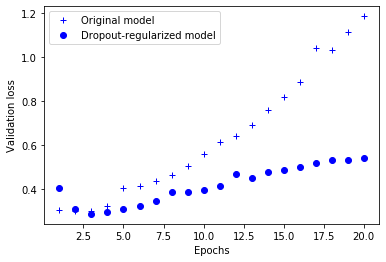

In [17]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 3.2 Monitoring deep learning models using Keras callbacks and  Tensorboard
#### 3.2.1 Keras Callbacks

- overfitting을 막기 위해서는 모형을 학습하는 중간에  epoch 수에 따라 변하는 여러 measure들을 확인할 필요가 있음 
- `EarlyStopping`: Validation set에 대한 measure가  더 이상 개선되지 않을 때 학습을 자동으로 멈춤
    - `monitor='acc'`: validation accuracy를 기준으로  학습 중단여부 판단 
    - `patience=1`: validation accuracy가 개선이 안되더라도 1 epoch는 기다린 후 여전
- `ModelCheckpoint`: 지정한 measure(예:validation loss)가 최소값일 때의 모델과 weight를 저장하여 overfitting이 발생하기 전의 model을 나중에 불러들여 사용할 수 있음
    - `save_best_only=True`: monitoring 중인 measure를 기준으로 최적의 모형의 weight만 저장 


https://keras.io/callbacks/


In [18]:
K.clear_session()
tensorboard_model = models.Sequential()
tensorboard_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
tensorboard_model.add(layers.Dense(16, activation='relu'))
tensorboard_model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
tensorboard_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

tensorboard = tensorboard_model.fit(x_train, y_train,
                       epochs=20,
                       batch_size=256,
                       validation_data=(x_test, y_test),
                       verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.3953 - acc: 0.8402 - val_loss: 0.2941 - val_acc: 0.8861
Epoch 2/20
 - 4s - loss: 0.2218 - acc: 0.9183 - val_loss: 0.3289 - val_acc: 0.8666
Epoch 3/20
 - 3s - loss: 0.1749 - acc: 0.9361 - val_loss: 0.3016 - val_acc: 0.8825
Epoch 4/20
 - 3s - loss: 0.1470 - acc: 0.9476 - val_loss: 0.3425 - val_acc: 0.8722
Epoch 5/20
 - 6s - loss: 0.1285 - acc: 0.9540 - val_loss: 0.3594 - val_acc: 0.8708
Epoch 6/20
 - 5s - loss: 0.1110 - acc: 0.9604 - val_loss: 0.3939 - val_acc: 0.8674
Epoch 7/20
 - 4s - loss: 0.0947 - acc: 0.9668 - val_loss: 0.4399 - val_acc: 0.8639
Epoch 8/20
 - 4s - loss: 0.0812 - acc: 0.9722 - val_loss: 0.5058 - val_acc: 0.8520
Epoch 9/20
 - 3s - loss: 0.0699 - acc: 0.9765 - val_loss: 0.5219 - val_acc: 0.8579
Epoch 10/20
 - 5s - loss: 0.0582 - acc: 0.9797 - val_loss: 0.5866 - val_acc: 0.8550
Epoch 11/20
 - 3s - loss: 0.0468 - acc: 0.9850 - val_loss: 0.6493 - val_acc: 0.8528
Epoch 12/20
 - 4s - loss: 0.0387 - 

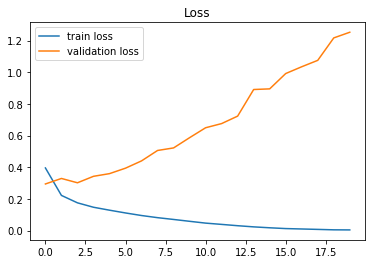

In [20]:
plt.plot(tensorboard.history["loss"], label="train loss")
plt.plot(tensorboard.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

## 3.3 Hyperparameter tuning


- Parameters
    - 주어진 모델에 대한 loss 함수의 변수들
        - Weights $W$
        - Bias $b$
- Hypterparameters
    - 모형의 구조를 결정하거나 optimization 방법을 결정하는 변수들 
    - $W$, $b$를 최종적으로 결정 
        - Optimizer의 종류
        - learning rate($\alpha$)
        - Hidden layer의 수 
        - Hidden unit의 수 
        - Iteration의 수 
        - Activation function의 종류
        - Minibatch size 
        - Regularization
    
- Applied deep learning is a very empirical process.
- 다양한 조합의 hyperparameter를 시도해서 loss 함수가 빠르게 감소하는 hypterparameter를 찾아내는 시도가 필요 

<img src="figures/emp.png" width="30%" align="left">
<img src="figures/lr.png" width="50%">




- Hyperparameter가 모형 성능을 좌우 
- Systematic hyperparameter search가 중요 
- 고려해야 할 주요한 hyperparameters
    - Learning rate($\alpha$): 일반적으로 가장 중요 
    - Hidden units의 수 
    - Mini-batch size 
    - Momentum 값, Adam의 $\beta$ 값 
    - Layers의 수 

- Grid search 보다는 random search가 효율적
    - 중요한 parameter에 대해 더 많은 값에 대해 탐색 가능 
    <img src="figures/gridsearch.png" width="80%">

- Coarse to fine search 
    - 듬성듬성한 random search 후 성능이 좋은 값 주변을 보다 조밀하게 탐색
    <img src="figures/coarse-to-fine.png" width="40%">

- Appropriate scale for hyperparameter search
    - Hidden unit의 수, layer의 수 
        - 예) 50~100 범위에서 균일한 random number의 hidden unit 수 고려 
    - Learning rate $\alpha$ 
        - Log scale에서 random number 고려 
        - 작은 $\alpha$ 부분을 보다 촘촘하게 sampling
            <img src="figures/logscale.PNG" width="60%">

In [21]:
import numpy as np
np.random.rand(10)

array([0.65617505, 0.76495567, 0.99968047, 0.03847529, 0.27875452,
       0.33857085, 0.20167801, 0.17925646, 0.93977296, 0.89672785])

In [22]:
r=-4*np.random.rand(10)
alpha=10**r

In [23]:
alpha

array([2.62882789e-03, 3.66837005e-04, 2.14008160e-02, 5.79697188e-01,
       7.39429508e-04, 7.05494234e-01, 2.22131322e-01, 7.48650160e-03,
       4.72424742e-04, 1.90515624e-01])

In [24]:
K.clear_session()
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


#now = time.strftime("%c")
#callbacks_list = [
#    ModelCheckpoint(filepath='movie_review'+now+'.h5',monitor='val_loss',save_best_only=True),
#    TensorBoard(log_dir='./logs/movie_review'+now, histogram_freq=1)
#]

from keras import optimizers

model.compile(optimizer=optimizers.rmsprop(lr=alpha[0]),
                       loss='binary_crossentropy',
                       metrics=['acc'])

hist = model.fit(x_train, y_train,
               epochs=20,
               batch_size=256,
               validation_data=(x_test, y_test),
               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.3672 - acc: 0.8442 - val_loss: 0.3984 - val_acc: 0.8365
Epoch 2/20
 - 4s - loss: 0.2142 - acc: 0.9188 - val_loss: 0.2977 - val_acc: 0.8822
Epoch 3/20
 - 4s - loss: 0.1667 - acc: 0.9360 - val_loss: 0.3311 - val_acc: 0.8764
Epoch 4/20
 - 3s - loss: 0.1314 - acc: 0.9505 - val_loss: 0.3749 - val_acc: 0.8693
Epoch 5/20
 - 3s - loss: 0.1045 - acc: 0.9602 - val_loss: 0.4144 - val_acc: 0.8650
Epoch 6/20
 - 3s - loss: 0.0755 - acc: 0.9718 - val_loss: 0.4942 - val_acc: 0.8601
Epoch 7/20
 - 3s - loss: 0.0539 - acc: 0.9803 - val_loss: 0.5581 - val_acc: 0.8604
Epoch 8/20
 - 3s - loss: 0.0346 - acc: 0.9877 - val_loss: 0.6707 - val_acc: 0.8588
Epoch 9/20
 - 3s - loss: 0.0230 - acc: 0.9923 - val_loss: 0.7727 - val_acc: 0.8567
Epoch 10/20
 - 3s - loss: 0.0178 - acc: 0.9947 - val_loss: 0.9083 - val_acc: 0.8570
Epoch 11/20
 - 4s - loss: 0.0161 - acc: 0.9957 - val_loss: 1.0169 - val_acc: 0.8547
Epoch 12/20
 - 3s - loss: 0.0064 - 

In [25]:
np.min(hist.history['val_loss'])

0.29772731746196746

## 3.4 The universal workflow of machine learning 

#### (1) 문제 정의와 데이터셋 수집 
- 무엇을 예측하려 하는가? 이를 예측하기 위한 training data가 있는가? 
    - Ex) 영화 리뷰의 감성 분류를 학습하기 위해서는 각 영화 리뷰의 감성 레이블이 태깅되어 있는 데이터가 있어야 함 

- 예측하려는 문제의 종류는 무엇인가?
    - Binary classification
    - Multi-class classification 
    - Multi-label classification
    - Regression
    - Clustering
    - Reinforcement learning 
    
    

#### (2) 성공 지표의 선택
- ROC AUC는 일반적인 지표 
- 클래스 분포가 균일하지 않다면 precision(=TP/(TP+FP)), recall(=TP/(TP+FN))을 사용할 수 있음
- multi-label classification인 경우 average precision 사용 

#### (3) 평가 방법 선택
- Hold-out validation set 사용
    - Train data의 일정 부분을 validation set으로 사용 
    - 데이터의 양이 많을 때 사용하는 방법
    - `keras.model.fit`의 `validation_data` 또는 `validation_split` option
- K-fold cross-validation
    - Train set을 K-개의 무작위 set으로 구분한 뒤 하나씩 validation set으로 사용하며 반복
    - Hold-out validation set을 구성하기에 데이터가 적을 때 사용  
    - Keras 자체의 cv 모듈이 없으므로 scikit-learn의 `KFold`를 사용 (참고: https://3months.tistory.com/321)
- Iterated K-fold cross-validation 
    - K-fold CV를 반복
    - 데이터가 적으나 정확한 모델 평가가 필요할 때 사용 

#### (4) 데이터 준비 
- Input data는 일반적으로 [-1,1] 혹은 [0,1] 사이의 데이터로 스케일 조정
- 사용하려는 모델에 맞는 input 형태로 조정 

#### (5) Baseline보다 나은 모델 훈련 
- 이진분류 라면 정확도 0.5, MNIST 데이터라면 정확도 0.1보다 높은 모형 만들기 
- 마지막 layer의 activation function 선택
    - output의 형태에 따라 조정
    - Sigmoid, softmax, linear 등
- Loss function 선택
    - 풀고자 하는 문제의 종류에 따라 선택
    - binary_crossentropy, categorical_crossentropy, mse 등
    - 미분 가능해야 하고 주어진 mini-batch에서 계산 가능해야 함. (ROC AUC 등은 사용 불가) 
- Optimizer와 learning rate 선택 
    - rmsprop, adam과 default learning rate 사용이 무난 
    
<img src="figures/cheatsheet_loss.PNG" width="100%">

#### (6) Scaling up: overfitting 모델 구축 
- 충분한 성능을 나타내는 모델을 만들기 위해 모형을 크게 확장 
    - Layer 추가 
    - 각 layer의 unit 추가 
    - Epoch 수 증가 
- train loss와 validation loss를 모니터 

#### (7) Regularization, hyperparameter tuning 
- 반복적으로 모델 수정, 훈련, 평가하며 모델 튜닝 
    - Dropout 추가 
    - Layer 추가 혹은 제거 
    - L1 또는 L2 penalty 추가 
    - Layer의 unit 수나 learning rate의 튜닝 
    
- 주의: 이 과정을 반복한다는 것은 validation set에  대해 모델이 적합되고 있는 것이기 때문에 이후 test set에서의 성능이 validation 성능보다 낮아질 수 있음 (즉, validation set에 overfitting) 
    - K-fold CV/ iterated K-fold CV 등으로 검증 방법 바꾸는 것도 방법 


        
References
- https://www.coursera.org/specializations/deep-learning
- [Hands on Machine Learning with Scikit-Learn  and Tensorflow, Aurélien Géron]( http://www.hanbit.co.kr/store/books/look.php?p_code=B9267655530)
- [Deep Learning with Python, François Chollet,](https://www.manning.com/books/deep-learning-with-python)